In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

rcParams.update({'font.family':'Arial','font.size':18})

21 3


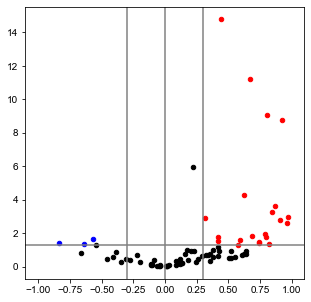

In [2]:
corr1 = []
corr2 = []
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
for i in os.listdir("./BRCA_data/"):
    d = {'Mes':[],'Epi':[],'basal':[],'p-EMT':[],'luminal':[],'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':[]}
    with open("./BRCA_data/"+i+"/"+os.listdir("./BRCA_data/"+i+"/")[1]+"/ssgsea_report/gseapy.samples.normalized.es.txt") as f:
        for l in f:
            x = l[:-1].split("\t")
            if x[0] in ['basal','luminal','Mes','Epi','p-EMT','pEMT','HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION']:
                if x[0] in ['p-EMT','pEMT']:
                    x[0] = 'p-EMT'
                d[x[0]] = [float(i) for i in x[1:]]
    corr = ss.pearsonr(d["basal"],d["p-EMT"])
    corr1.append(corr[0])
    corr2.append(corr[1])

c1 = c2 = 0
for i,j in enumerate(corr1):
    if j >= 0.3 and corr2[i] <= 0.05:
        c1 += 1
        plt.scatter([j],-1*np.log10([corr2[i]]),c='red',s=20)
    elif j <= -0.3 and corr2[i] <= 0.05:
        c2 += 1
        plt.scatter([j],-1*np.log10([corr2[i]]),c='blue',s=20)
    else:
        plt.scatter([j],-1*np.log10([corr2[i]]),c='black',s=20)
print(c1,c2)
plt.xlim([-1.1,1.1])
plt.axhline(y = 1.301,c='grey')
plt.axvline(x = 0.3,c='grey')
plt.axvline(x = 0,c='grey')
plt.axvline(x = -0.3,c='grey')

#plt.savefig("BRCA_bas_pEMT_21_3.png",dpi=800)

8 10


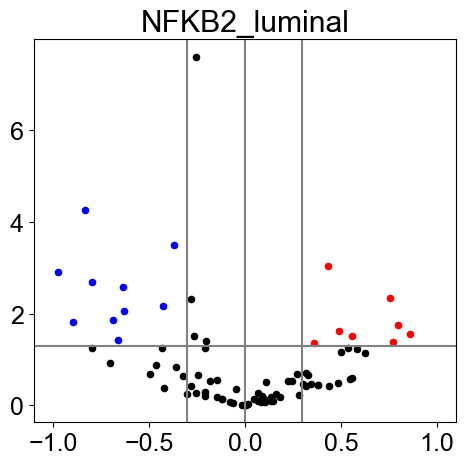

7 7


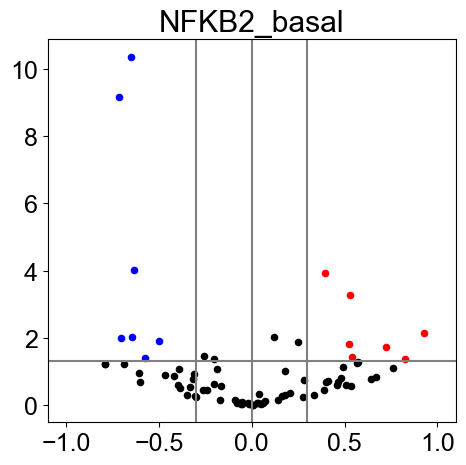

11 13


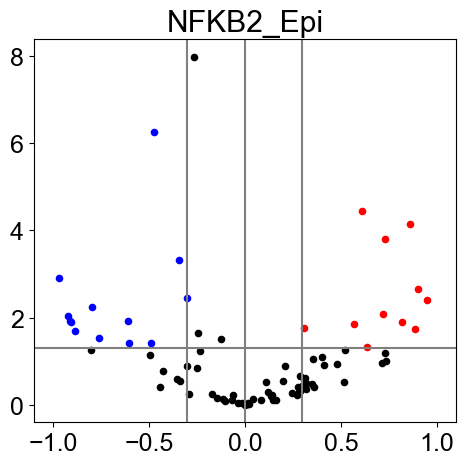

11 13


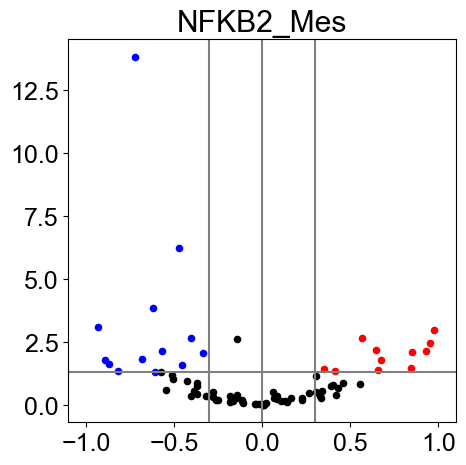

18 7


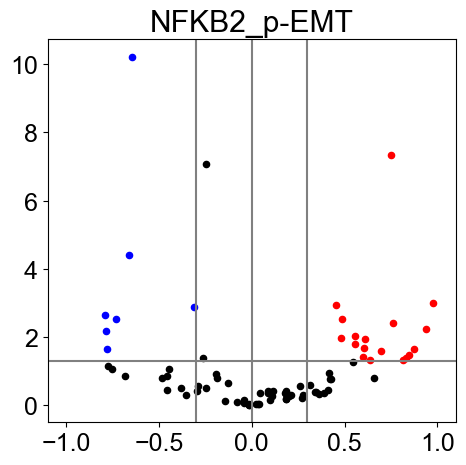

In [3]:
gene = "NFKB2"
pathway = "luminal"

corr1 = {}
corr2 = {}
for i in os.listdir("./BRCA_data/"):
    d1 = {}
    for j in os.listdir("./BRCA_data/"+i+"/"):
        if j[-4:] == ".txt":
            filename = j
        with open("./BRCA_data/"+i+"/"+filename) as f:
            for line in f:
                a = line[:-1].split("\t")
                if a[0] != gene:
                    continue
                else:
                    try:
                        d1[gene] = [float(i) for i in a[1:]]
                    except ValueError:
                        d1[gene] = [float(i) for i in a[2:]]
    if gene not in d1:
        continue
    d = {'Mes':[],'Epi':[],'basal':[],'p-EMT':[],'luminal':[],'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':[]}
    with open("./BRCA_data/"+i+"/"+os.listdir("./BRCA_data/"+i+"/")[1]+"/ssgsea_report/gseapy.samples.normalized.es.txt") as f:
        for l in f:
            x = l[:-1].split("\t")
            if x[0] in ['basal','luminal','Mes','Epi','p-EMT','pEMT','HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION']:
                if x[0] in ['p-EMT','pEMT']:
                    x[0] = 'p-EMT'
                d[x[0]] = [float(i) for i in x[1:]]

    for pathway in ['luminal','basal','Epi','Mes','p-EMT']:          
        if len(d[pathway]) < len(d1[gene]):
            d1[gene] = d1[gene][1:]
        corr = ss.pearsonr(d[pathway],d1[gene])
        if pathway not in corr1:
            corr1[pathway] = []
            corr2[pathway] = []
        corr1[pathway].append(corr[0])
        corr2[pathway].append(corr[1])

for pathway in ['luminal','basal','Epi','Mes','p-EMT']:
    f = plt.figure()
    f.set_figwidth(5)
    f.set_figheight(5)

    c1 = c2 = 0
    for i,j in enumerate(corr1[pathway]):
        if j >= 0.3 and corr2[pathway][i] <= 0.05:
            c1 += 1
            plt.scatter([j],-1*np.log10([corr2[pathway][i]]),c='red',s=20)
        elif j <= -0.3 and corr2[pathway][i] <= 0.05:
            c2 += 1
            plt.scatter([j],-1*np.log10([corr2[pathway][i]]),c='blue',s=20)
        else:
            plt.scatter([j],-1*np.log10([corr2[pathway][i]]),c='black',s=20)
    print(c1,c2)
    plt.xlim([-1.1,1.1])
    plt.axhline(y = 1.301,c='grey')
    plt.axvline(x = 0.3,c='grey')
    plt.axvline(x = 0,c='grey')
    plt.axvline(x = -0.3,c='grey')
    plt.title(gene+"_"+pathway)
    plt.tight_layout()
    plt.savefig("./ligands/BRCA_"+gene+"_"+pathway+".png",dpi=800)
    plt.show()
    plt.close()

In [29]:
list_lum_bas = list(pd.read_csv("ligand_receptors_patient_atlas.txt",header=None)[0])

In [39]:

for gene in list_lum_bas:
    corr1 = {}
    corr2 = {}
    x_list = []
    for i in os.listdir("./BRCA_data/"):
        d1 = {}
        for j in os.listdir("./BRCA_data/"+i+"/"):
            if j[-4:] == ".txt":
                filename = j
            with open("./BRCA_data/"+i+"/"+filename) as f:
                for line in f:
                    a = line[:-1].split("\t")
                    if a[0] != gene:
                        continue
                    else:
                        try:
                            d1[gene] = [float(i) for i in a[1:]]
                        except ValueError:
                            d1[gene] = [float(i) for i in a[2:]]
        if gene not in d1:
            continue
        d = {'Mes':[],'Epi':[],'basal':[],'p-EMT':[],'luminal':[],'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':[]}
        with open("./BRCA_data/"+i+"/"+os.listdir("./BRCA_data/"+i+"/")[1]+"/ssgsea_report/gseapy.samples.normalized.es.txt") as f:
            for l in f:
                x = l[:-1].split("\t")
                if x[0] in ['basal','luminal','Mes','Epi','p-EMT','pEMT','HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION']:
                    if x[0] in ['p-EMT','pEMT']:
                        x[0] = 'p-EMT'
                    d[x[0]] = [float(i) for i in x[1:]]

        for pathway in ['luminal','basal','Epi','Mes','p-EMT']:          
            if len(d[pathway]) < len(d1[gene]):
                d1[gene] = d1[gene][1:]
            corr = ss.pearsonr(d[pathway],d1[gene])
            if pathway not in corr1:
                corr1[pathway] = []
                corr2[pathway] = []
            corr1[pathway].append(corr[0])
            corr2[pathway].append(corr[1])

    for pathway in ['luminal','basal','Epi','Mes','p-EMT']:

        c1 = c2 = 0
        for i,j in enumerate(corr1[pathway]):
            if j >= 0.3 and corr2[pathway][i] <= 0.05:
                c1 += 1
            elif j <= -0.3 and corr2[pathway][i] <= 0.05:
                c2 += 1
        x_list.append(c1)
        x_list.append(c2)
    with open("data_meta_all_ligands_receptors.txt","a+") as f1:
        f1.write(gene+","+','.join([str(i) for i in x_list])+"\n")

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
